In [56]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('C:/Users/Milosz/Desktop/python_programs/JUPYTER/Housing_prices_comp/train.csv')
df_copy = df.copy()

In [58]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [59]:
X_train = df.drop(['SalePrice'], axis=1)

In [60]:
X_train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [61]:
for column in X_train.columns:
    if (df[column].dtype in ['int64', 'float64']):
        print('{}, {} , {}'.format(column, df[column].dtype, df[column].nunique()))

Id, int64 , 1460
MSSubClass, int64 , 15
LotFrontage, float64 , 110
LotArea, int64 , 1073
OverallQual, int64 , 10
OverallCond, int64 , 9
YearBuilt, int64 , 112
YearRemodAdd, int64 , 61
MasVnrArea, float64 , 327
BsmtFinSF1, int64 , 637
BsmtFinSF2, int64 , 144
BsmtUnfSF, int64 , 780
TotalBsmtSF, int64 , 721
1stFlrSF, int64 , 753
2ndFlrSF, int64 , 417
LowQualFinSF, int64 , 24
GrLivArea, int64 , 861
BsmtFullBath, int64 , 4
BsmtHalfBath, int64 , 3
FullBath, int64 , 4
HalfBath, int64 , 3
BedroomAbvGr, int64 , 8
KitchenAbvGr, int64 , 4
TotRmsAbvGrd, int64 , 12
Fireplaces, int64 , 4
GarageYrBlt, float64 , 97
GarageCars, int64 , 5
GarageArea, int64 , 441
WoodDeckSF, int64 , 274
OpenPorchSF, int64 , 202
EnclosedPorch, int64 , 120
3SsnPorch, int64 , 20
ScreenPorch, int64 , 76
PoolArea, int64 , 8
MiscVal, int64 , 21
MoSold, int64 , 12
YrSold, int64 , 5


In [62]:
for column in X_train.columns:
    if (df[column].dtype == 'O'):
        print('{}, {} , {}'.format(column, df[column].dtype, df[column].nunique()))

MSZoning, object , 5
Street, object , 2
Alley, object , 2
LotShape, object , 4
LandContour, object , 4
Utilities, object , 2
LotConfig, object , 5
LandSlope, object , 3
Neighborhood, object , 25
Condition1, object , 9
Condition2, object , 8
BldgType, object , 5
HouseStyle, object , 8
RoofStyle, object , 6
RoofMatl, object , 8
Exterior1st, object , 15
Exterior2nd, object , 16
MasVnrType, object , 4
ExterQual, object , 4
ExterCond, object , 5
Foundation, object , 6
BsmtQual, object , 4
BsmtCond, object , 4
BsmtExposure, object , 4
BsmtFinType1, object , 6
BsmtFinType2, object , 6
Heating, object , 6
HeatingQC, object , 5
CentralAir, object , 2
Electrical, object , 5
KitchenQual, object , 4
Functional, object , 7
FireplaceQu, object , 5
GarageType, object , 6
GarageFinish, object , 3
GarageQual, object , 5
GarageCond, object , 5
PavedDrive, object , 3
PoolQC, object , 3
Fence, object , 4
MiscFeature, object , 4
SaleType, object , 9
SaleCondition, object , 6


In [63]:
numerical_col = [column for column in X_train.columns if (X_train[column].dtype in ['int64', 'float64'])]

categorical_col = list(set(X_train.columns) - set(numerical_col))

In [64]:
for col in categorical_col:
    print(col)

BldgType
PoolQC
LotShape
FireplaceQu
Exterior1st
BsmtQual
BsmtCond
SaleCondition
CentralAir
LotConfig
RoofMatl
Foundation
Alley
Condition1
Street
GarageQual
Heating
LandContour
Electrical
ExterQual
HeatingQC
SaleType
RoofStyle
LandSlope
PavedDrive
MiscFeature
GarageCond
GarageType
ExterCond
HouseStyle
BsmtExposure
KitchenQual
BsmtFinType2
Utilities
MasVnrType
Neighborhood
MSZoning
BsmtFinType1
Functional
Fence
Condition2
Exterior2nd
GarageFinish


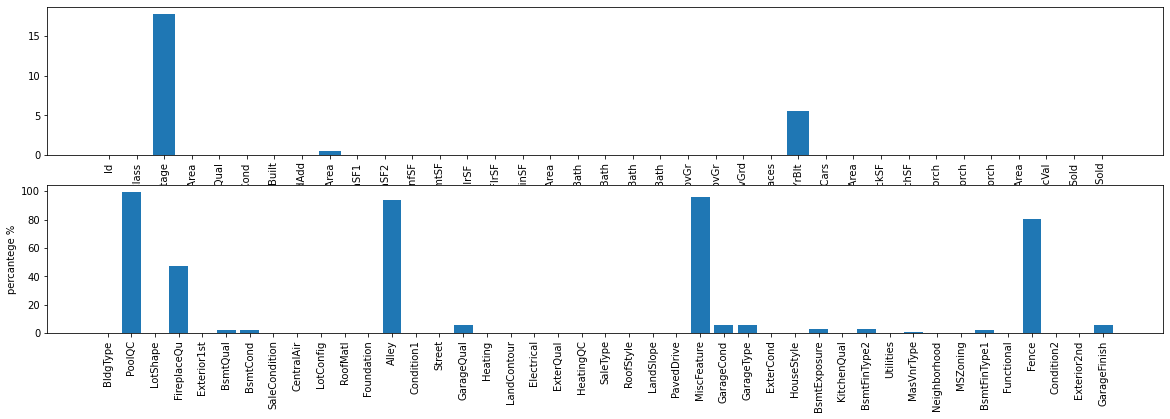

In [65]:
fig, ax = plt.subplots(2, figsize=(20,6))
cols_n = [col for col in numerical_col]
na_n = [X_train[col].isna().sum()/len(X_train.index) * 100 for col in numerical_col]
cols_c = [col for col in categorical_col]
na_c = [X_train[col].isna().sum()/len(X_train.index) * 100 for col in categorical_col]

ax[0].bar(cols_n, na_n)
ax[0].tick_params(axis='x', labelrotation=90)
ax[1].bar(cols_c, na_c)
ax[1].tick_params(axis='x', labelrotation=90)
plt.ylabel("percantege %")
plt.show()

## I need to remove columns where amount of NaN values is higher than given threshold. eg. 20%. We can notice numerical vals can be filled with SimpleImputer so we'll be removing from categorical_cols

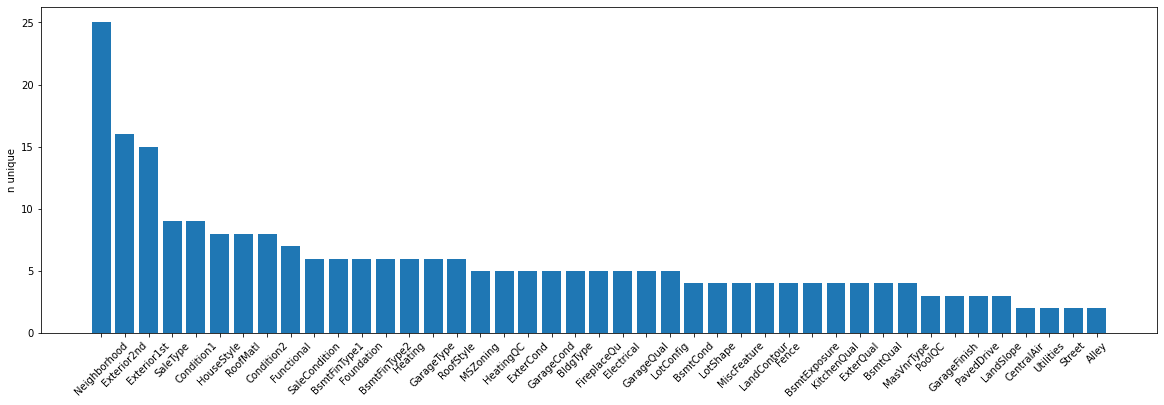

In [66]:
sorted_nunique = X_train[categorical_col].nunique().sort_values(ascending=False)
cols_c = sorted_nunique.index
nunique_c = sorted_nunique.values

plt.figure(2, figsize=(20,6))
plt.bar(cols_c, nunique_c)
plt.tick_params(axis='x', labelrotation=45)
plt.ylabel("n unique")
plt.show()

## Moreover I need to remove cols with big number of unique vals, try 10

In [67]:
threshold = 0.2
for col in categorical_col:
    if (X_train[col].isna().sum()/len(X_train.index) > threshold) or (X_train[col].nunique() > 10):
        categorical_col.remove(col)
len(categorical_col)

36

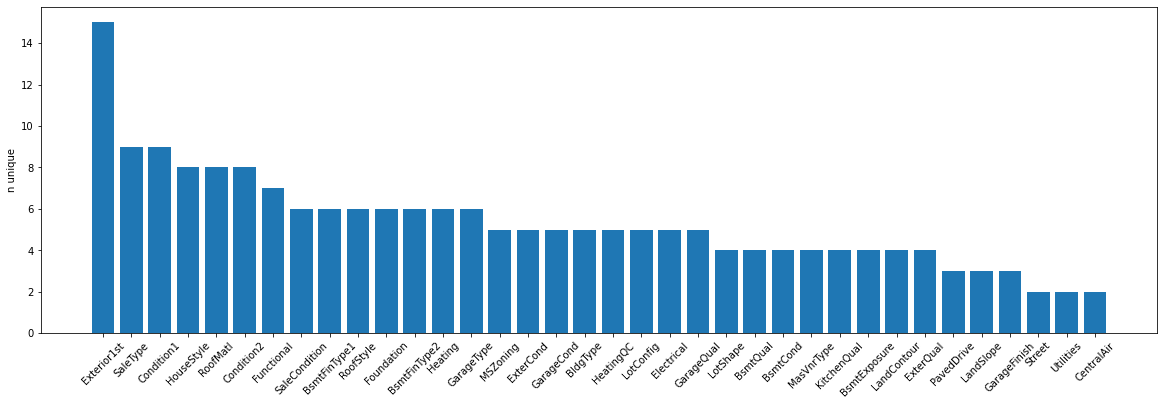

In [68]:
sorted_nunique = X_train[categorical_col].nunique().sort_values(ascending=False)
cols_c = sorted_nunique.index
nunique_c = sorted_nunique.values

plt.figure(2, figsize=(20,6))
plt.bar(cols_c, nunique_c)
plt.tick_params(axis='x', labelrotation=45)
plt.ylabel("n unique")
plt.show()

In [69]:
X_train.isna().sum(axis=0).sort_values(ascending=False).head(10)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageQual       81
GarageCond       81
dtype: int64

## TO IMPROVE: don't remove all the nans categoricals, in some features NaN means that: "There is no ..."

>**<center>Filling NaN values from numerical cols with median</center>**

In [70]:
num_imputer = SimpleImputer(missing_values=np.NaN, strategy = 'median')
num_imputer.fit(X_train[numerical_col])
X_train[numerical_col] = num_imputer.transform(X_train[numerical_col])
X_train[numerical_col]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,252.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,240.0,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0


In [71]:
X_train[categorical_col].isna().sum()

BldgType          0
LotShape          0
Exterior1st       0
BsmtQual         37
BsmtCond         37
SaleCondition     0
CentralAir        0
LotConfig         0
RoofMatl          0
Foundation        0
Condition1        0
Street            0
GarageQual       81
Heating           0
LandContour       0
Electrical        1
ExterQual         0
HeatingQC         0
SaleType          0
RoofStyle         0
LandSlope         0
PavedDrive        0
GarageCond       81
GarageType       81
ExterCond         0
HouseStyle        0
BsmtExposure     38
KitchenQual       0
BsmtFinType2     38
Utilities         0
MasVnrType        8
MSZoning          0
BsmtFinType1     37
Functional        0
Condition2        0
GarageFinish     81
dtype: int64

In [72]:
cat_imputer = SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')
cat_imputer.fit(X_train[categorical_col])
X_train[categorical_col] = cat_imputer.transform(X_train[categorical_col])

In [73]:
X_train = X_train[numerical_col + categorical_col]
id_col = X_train.Id
X_train.drop(['Id'], axis=1, inplace=True)

> ## ORDINAL DATA HANDLING

In [74]:
for column in categorical_col:
    print(f'{column} : [{X_train[column].unique()}]')

BldgType : [['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']]
LotShape : [['Reg' 'IR1' 'IR2' 'IR3']]
Exterior1st : [['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']]
BsmtQual : [['Gd' 'TA' 'Ex' 'Fa']]
BsmtCond : [['TA' 'Gd' 'Fa' 'Po']]
SaleCondition : [['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']]
CentralAir : [['Y' 'N']]
LotConfig : [['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']]
RoofMatl : [['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']]
Foundation : [['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']]
Condition1 : [['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']]
Street : [['Pave' 'Grvl']]
GarageQual : [['TA' 'Fa' 'Gd' 'Ex' 'Po']]
Heating : [['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']]
LandContour : [['Lvl' 'Bnk' 'Low' 'HLS']]
Electrical : [['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']]
ExterQual : [['Gd' 'TA' 'Ex' 'Fa']]
HeatingQC : 

In [75]:
ordinal_col = ['ExterQual', 'BsmtQual', 'KitchenQual', 'Functional', 'GarageCond', 'LandSlope', 'BsmtFinType2', 
               'GarageQual', 'CentralAir', 'BsmtFinType1', 'BsmtCond', 'PavedDrive', 'ExterCond', 'HeatingQC',
               'GarageFinish']
quality1 = ['ExterQual', 'BsmtQual', 'KitchenQual', 'GarageCond', 'GarageQual', 'BsmtCond', 'ExterCond', 'HeatingQC']
quality2 = ['Functional']
quality3 = ['LandSlope']
quality4 = ['BsmtFinType1', 'BsmtFinType2']
quality5 = ['CentralAir', 'PavedDrive']
quality6 = ['GarageFinish']

order1 = [np.NaN, 'Po', 'Fa', 'TA', 'Gd', 'Ex']
order2 = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
order3 = ['Sev', 'Mod', 'Gtl']
order4 = [np.NaN, 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
order5 = ['N', 'P', 'Y']
order6 = [np.NaN, 'Unf', 'RFn', 'Fin']

quality_array = [(quality1, order1), (quality2, order2), (quality3, order3),
                 (quality4, order4), (quality5, order5), (quality6, order6)]

def assign_values(order):
    return {label: index for index, label in enumerate(order)}

for (cat, order) in quality_array:
    for col in cat:
        X_train[col] = X_train[col].map(assign_values(order))

**<center> PLOT MUTUAL INFORMATION SCORES </center>**

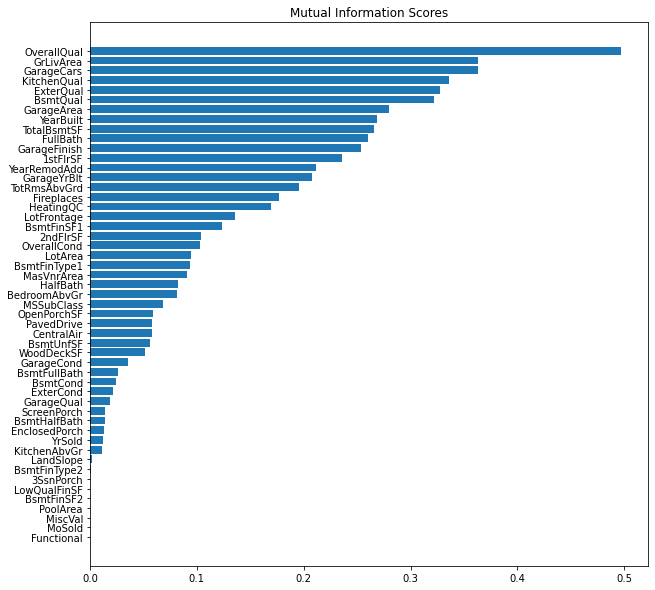

In [76]:
#transform float values to ints (residue after SimpleImputer)
#i dont know why it doesnt work with this columns even though they are int64
for col in numerical_col[1:]:
    X_train[col] = X_train[col].astype(int)

#make copy of X_train only with desired columns
cpy = X_train[numerical_col[1:]+ordinal_col].copy()
y = df['SalePrice']

#functions making list of MI scores and plotting it
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features='auto')
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=True)
    return mi_scores

def plot_mi_scores(scores):
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

mi_scores = make_mi_scores(cpy, y, numerical_col[1:]+ordinal_col)
plt.figure(figsize=(10,10))
plot_mi_scores(mi_scores)

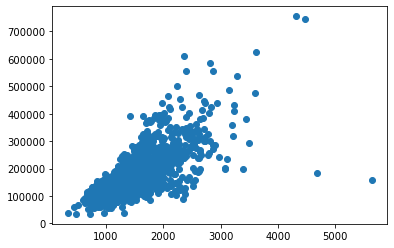

In [77]:
#some random plot indicating correlation between high-mi scored feature and price
plt.scatter(X_train.GrLivArea, y)

> # Now lets take care of the rest of Categorical variables
**<center>One hot encoder</center>**


In [85]:
categorical_col_new = list(set(categorical_col) - set(ordinal_col))

In [86]:
cpy_df = X_train[categorical_col_new].copy()
cpy_df

,BldgType,LotShape,Exterior1st,SaleCondition,LotConfig,RoofMatl,Foundation,Condition1,Street,Heating,...,Electrical,SaleType,RoofStyle,GarageType,HouseStyle,BsmtExposure,Utilities,MasVnrType,MSZoning,Condition2
0,1Fam,Reg,VinylSd,Normal,Inside,CompShg,PConc,Norm,Pave,GasA,...,SBrkr,WD,Gable,Attchd,2Story,No,AllPub,BrkFace,RL,Norm
1,1Fam,Reg,MetalSd,Normal,FR2,CompShg,CBlock,Feedr,Pave,GasA,...,SBrkr,WD,Gable,Attchd,1Story,Gd,AllPub,None,RL,Norm
2,1Fam,IR1,VinylSd,Normal,Inside,CompShg,PConc,Norm,Pave,GasA,...,SBrkr,WD,Gable,Attchd,2Story,Mn,AllPub,BrkFace,RL,Norm
3,1Fam,IR1,Wd Sdng,Abnorml,Corner,CompShg,BrkTil,Norm,Pave,GasA,...,SBrkr,WD,Gable,Detchd,2Story,No,AllPub,None,RL,Norm
4,1Fam,IR1,VinylSd,Normal,FR2,CompShg,PConc,Norm,Pave,GasA,...,SBrkr,WD,Gable,Attchd,2Story,Av,AllPub,BrkFace,RL,Norm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1Fam,Reg,VinylSd,Normal,Inside,CompShg,PConc,Norm,Pave,GasA,...,SBrkr,WD,Gable,Attchd,2Story,No,AllPub,None,RL,Norm
1456,1Fam,Reg,Plywood,Normal,Inside,CompShg,CBlock,Norm,Pave,GasA,...,SBrkr,WD,Gable,Attchd,1Story,No,AllPub,Stone,RL,Norm
1457,1Fam,Reg,CemntBd,Normal,Inside,CompShg,Stone,Norm,Pave,GasA,...,SBrkr,WD,Gable,Attchd,2Story,No,AllPub,None,RL,Norm
1458,1Fam,Reg,MetalSd,Normal,Inside,CompShg,CBlock,Norm,Pave,GasA,...,FuseA,WD,Hip,Attchd,1Story,Mn,AllPub,None,RL,Norm


In [87]:
columns_ohc=[]
for column in categorical_col_new:
    for idx in X_train[column].unique():
        columns_ohc.append(f'{column}_{idx}')

In [88]:
cpy_df[1:20]

,BldgType,LotShape,Exterior1st,SaleCondition,LotConfig,RoofMatl,Foundation,Condition1,Street,Heating,...,Electrical,SaleType,RoofStyle,GarageType,HouseStyle,BsmtExposure,Utilities,MasVnrType,MSZoning,Condition2
1,1Fam,Reg,MetalSd,Normal,FR2,CompShg,CBlock,Feedr,Pave,GasA,...,SBrkr,WD,Gable,Attchd,1Story,Gd,AllPub,None,RL,Norm
2,1Fam,IR1,VinylSd,Normal,Inside,CompShg,PConc,Norm,Pave,GasA,...,SBrkr,WD,Gable,Attchd,2Story,Mn,AllPub,BrkFace,RL,Norm
3,1Fam,IR1,Wd Sdng,Abnorml,Corner,CompShg,BrkTil,Norm,Pave,GasA,...,SBrkr,WD,Gable,Detchd,2Story,No,AllPub,None,RL,Norm
4,1Fam,IR1,VinylSd,Normal,FR2,CompShg,PConc,Norm,Pave,GasA,...,SBrkr,WD,Gable,Attchd,2Story,Av,AllPub,BrkFace,RL,Norm
5,1Fam,IR1,VinylSd,Normal,Inside,CompShg,Wood,Norm,Pave,GasA,...,SBrkr,WD,Gable,Attchd,1.5Fin,No,AllPub,None,RL,Norm
6,1Fam,Reg,VinylSd,Normal,Inside,CompShg,PConc,Norm,Pave,GasA,...,SBrkr,WD,Gable,Attchd,1Story,Av,AllPub,Stone,RL,Norm
7,1Fam,IR1,HdBoard,Normal,Corner,CompShg,CBlock,PosN,Pave,GasA,...,SBrkr,WD,Gable,Attchd,2Story,Mn,AllPub,Stone,RL,Norm
8,1Fam,Reg,BrkFace,Abnorml,Inside,CompShg,BrkTil,Artery,Pave,GasA,...,FuseF,WD,Gable,Detchd,1.5Fin,No,AllPub,None,RM,Norm
9,2fmCon,Reg,MetalSd,Normal,Corner,CompShg,BrkTil,Artery,Pave,GasA,...,SBrkr,WD,Gable,Attchd,1.5Unf,No,AllPub,None,RL,Artery
10,1Fam,Reg,HdBoard,Normal,Inside,CompShg,CBlock,Norm,Pave,GasA,...,SBrkr,WD,Hip,Detchd,1Story,No,AllPub,None,RL,Norm


In [89]:
'''ohc = OneHotEncoder(sparse=False)
X = ohc.fit_transform(copy_kurwa[categorical_col_new])
#copy_kurwa = pd.DataFrame(X)
dfOneHot = pd.DataFrame(X, columns = columns_ohc)'''

dfOneHot = pd.get_dummies(cpy_df)

In [90]:
dfOneHot[1:20]

,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Exterior1st_AsbShng,...,MSZoning_RL,MSZoning_RM,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn
1,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
6,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
7,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
8,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
9,0,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0


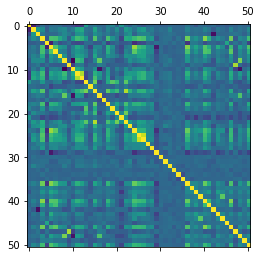

In [91]:
plt.matshow(X_train.corr())

In [92]:
X_train = pd.concat([X_train[numerical_col[1:]], X_train[ordinal_col], dfOneHot], axis=1, join='inner')

In [93]:
X_train = X_train.join(id_col, how='left')
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MSZoning_RM,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Id
0,60,65,8450,7,5,2003,2003,196,706,0,...,0,0,0,1,0,0,0,0,0,1.0
1,20,80,9600,6,8,1976,1976,0,978,0,...,0,0,0,1,0,0,0,0,0,2.0
2,60,68,11250,7,5,2001,2002,162,486,0,...,0,0,0,1,0,0,0,0,0,3.0
3,70,60,9550,7,5,1915,1970,0,216,0,...,0,0,0,1,0,0,0,0,0,4.0
4,60,84,14260,8,5,2000,2000,350,655,0,...,0,0,0,1,0,0,0,0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62,7917,6,5,1999,2000,0,0,0,...,0,0,0,1,0,0,0,0,0,1456.0
1456,20,85,13175,6,6,1978,1988,119,790,163,...,0,0,0,1,0,0,0,0,0,1457.0
1457,70,66,9042,7,9,1941,2006,0,275,0,...,0,0,0,1,0,0,0,0,0,1458.0
1458,20,68,9717,5,6,1950,1996,0,49,1029,...,0,0,0,1,0,0,0,0,0,1459.0


In [94]:
temp_cat = [numerical_col[1:]+ordinal_col][0]

C:\Users\Milosz\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
C:\Users\Milosz\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


[Text(0, -20.0, 'MSSubClass'),
 Text(0, 0.0, 'LotFrontage'),
 Text(0, 20.0, 'LotArea'),
 Text(0, 40.0, 'OverallQual'),
 Text(0, 60.0, 'OverallCond'),
 Text(0, 80.0, 'YearBuilt'),
 Text(0, 100.0, 'YearRemodAdd'),
 Text(0, 120.0, 'MasVnrArea'),
 Text(0, 140.0, 'BsmtFinSF1'),
 Text(0, 160.0, 'BsmtFinSF2'),
 Text(0, 180.0, 'BsmtUnfSF')]

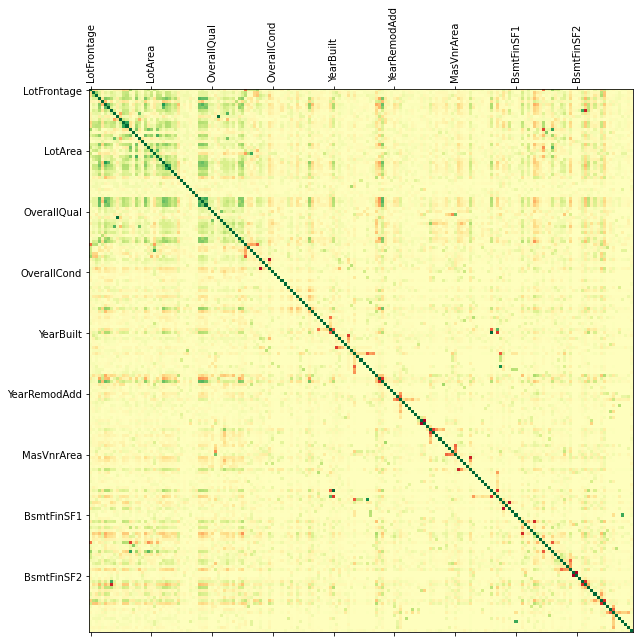

In [95]:
'''corr_df = X_train[temp_cat].corr(method='kendall', min_periods=1)
fix, ax = plt.subplots(figsize=(15,15))
ax.matshow(corr_df, cmap=plt.cm.RdYlGn)
ax.set_xticks(np.arange(len(X_train[temp_cat])))
ax.set_yticks(np.arange(len(X_train[temp_cat])))

ax.set_xticklabels(X_train[temp_cat], rotation=90)
ax.set_yticklabels(X_train[temp_cat])'''

corr_df = X_train.corr(method='kendall', min_periods=1)
fix, ax = plt.subplots(figsize=(10,10))
ax.matshow(corr_df, cmap=plt.cm.RdYlGn)
#ax.set_xticks(np.arange(len(X_train)))
#ax.set_yticks(np.arange(len(X_train)))

ax.set_xticklabels(X_train, rotation=90)
ax.set_yticklabels(X_train)


